# Magnetic susceptibility

Гамильтониан, статсумма и средняя намагниченность
$$
H = -J\sum_{\langle i, j\rangle}{\sigma_i\sigma_j} - h\sum_i{\sigma_i} \\
Z = \sum_\sigma {e^{-\beta H}} \\
\langle m\rangle = \frac{\sum_\sigma {me^{-\beta H}}}{Z} \\
$$

магнитная восприимчивость = отношение намагниченности к внешенму полю
$$
\frac{\partial\langle m\rangle}{\partial h} = \frac{\sum_\sigma {m e^{-\beta H} \left( -\beta \frac{\partial H}{\partial h}\right)} \cdot Z - \sum_\sigma {m e^{-\beta H}} \cdot \sum_\sigma {e^{-\beta H} \left( -\beta \frac{\partial H}{\partial h}\right)}}{Z^2}
$$

Заметим, что 

$$
\frac{\partial H}{\partial h} = -\sum_i\sigma_i = -m
$$
Тогда
$$
\frac{\partial\langle m\rangle}{\partial h} = \frac{\sum_\sigma {Z\beta m^2 e^{-\beta H}} - \sum_\sigma {m e^{-\beta H}}\cdot \sum_\sigma {\beta m e^{-\beta H}}}{Z^2} = \beta \left(\langle m^2\rangle - \langle m \rangle^2 \right)
$$

In [78]:
from utils import *
from jupyter_utils import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib
from ising_builds.cy_ising_cluster import simulate
from tqdm import tqdm

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
confs_1000 = load_Conformations_lite_from_dir('Conformations/L1000_beta0.1_1_10(10000)')

In [4]:
confs_250 = load_Conformations_lite_from_dir('Conformations/L250_beta0.1_1_10(10000)')

In [5]:
confs_500 = load_Conformations_lite_from_dir('Conformations/L500_beta0.1_1_10(10000)')

In [6]:
confs_2000 = load_Conformations_lite_from_dir('Conformations/L2000_beta0.1_1_10(10000)')

In [7]:
all_confs = [np.array(confs_250),
             np.array(confs_500),
             np.array(confs_1000),
             np.array(confs_2000)]

(array([], dtype=int64), {})


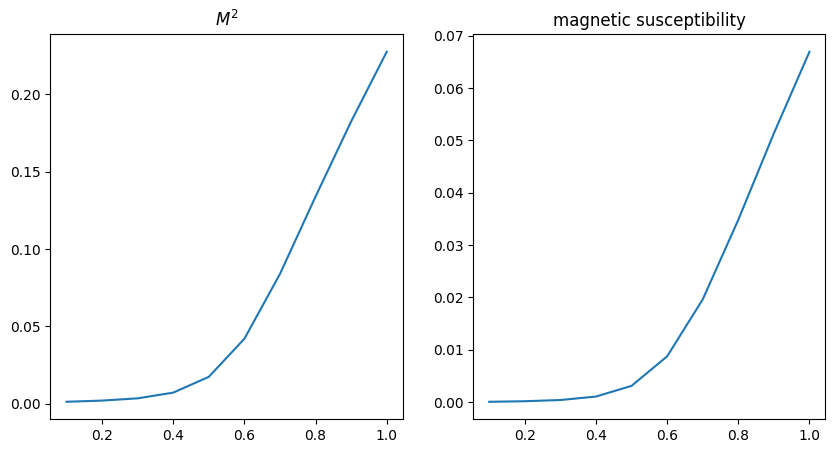

/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


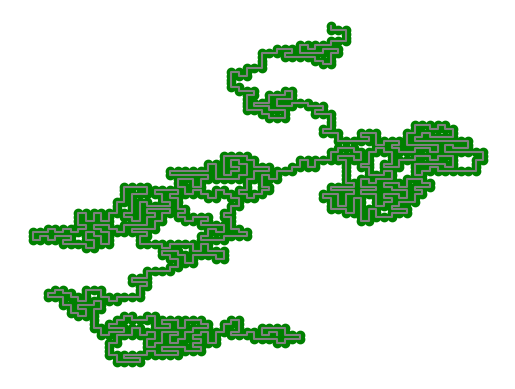

(array([4]), {})


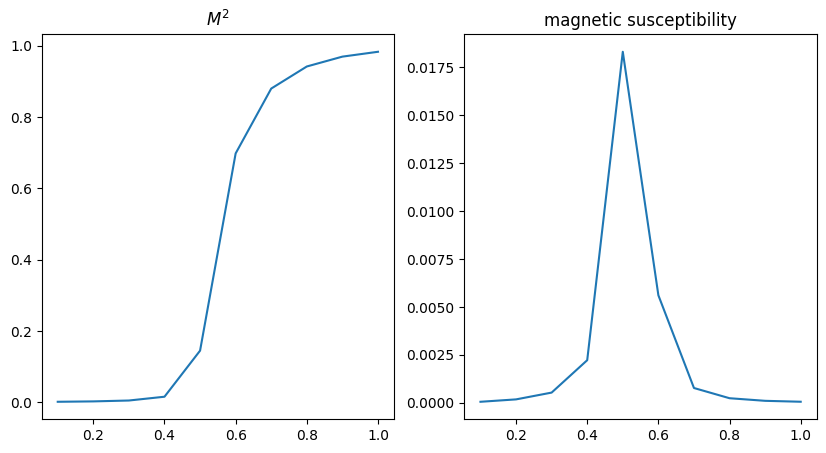

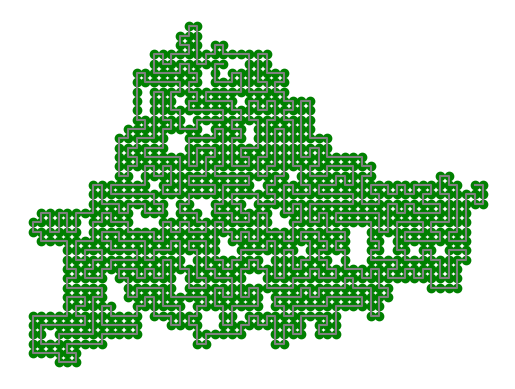

(array([], dtype=int64), {})


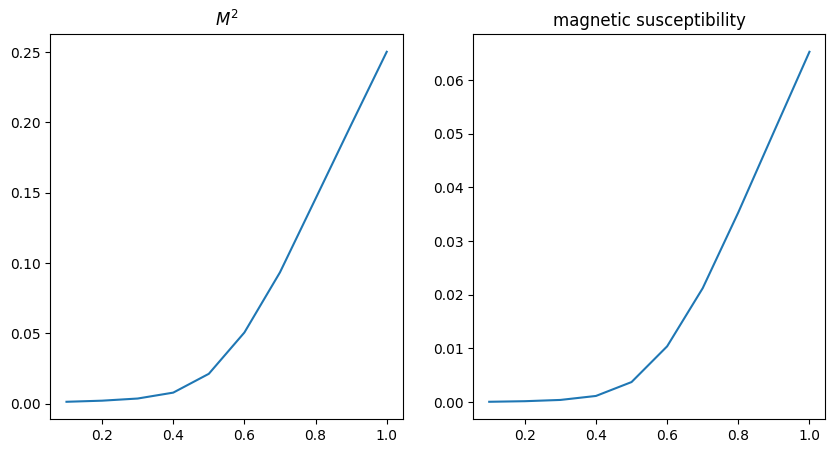

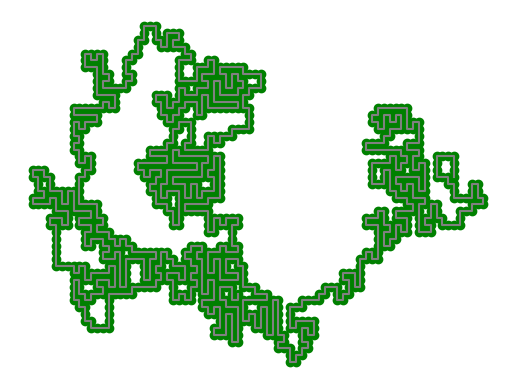

(array([4]), {})


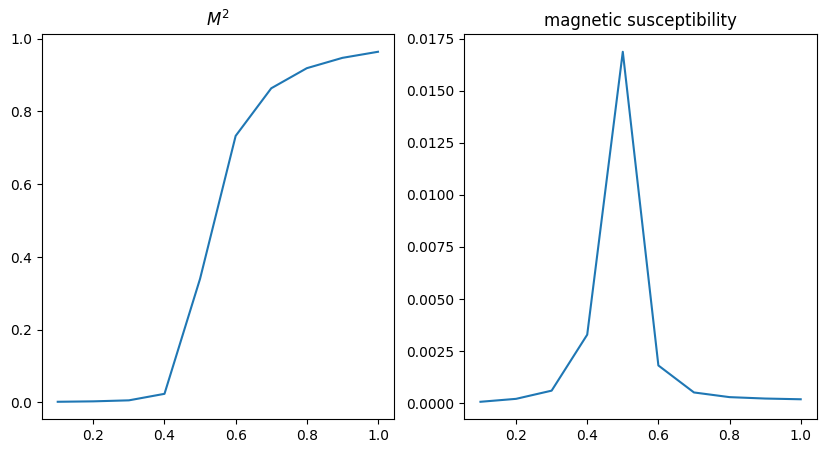

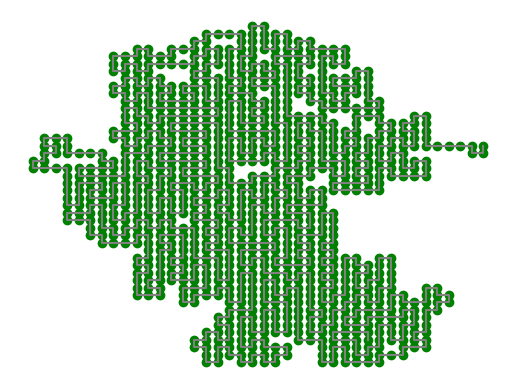

(array([], dtype=int64), {})


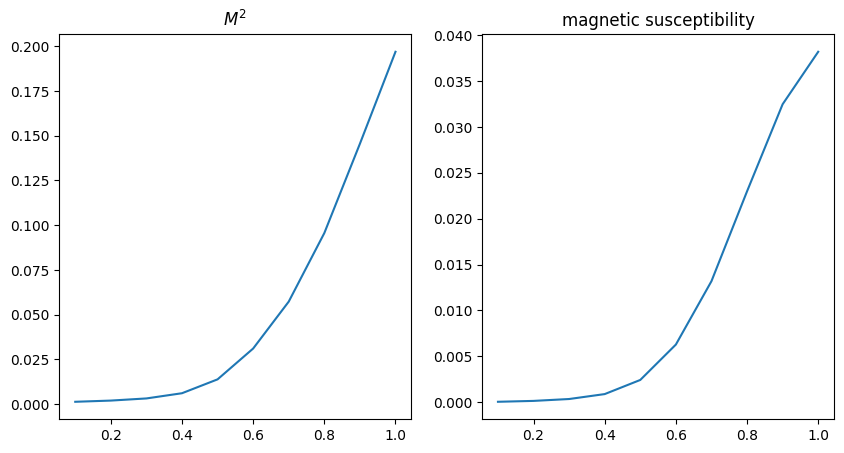

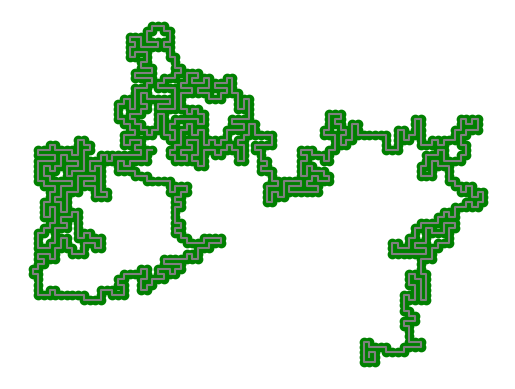

(array([4]), {})


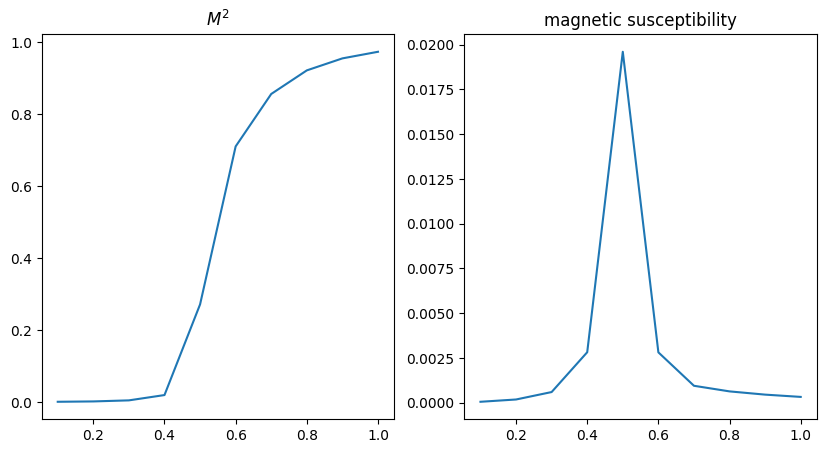

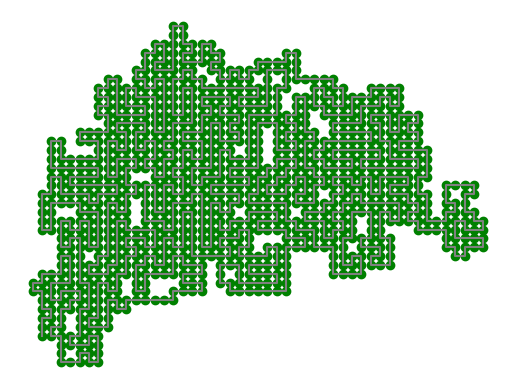

(array([], dtype=int64), {})


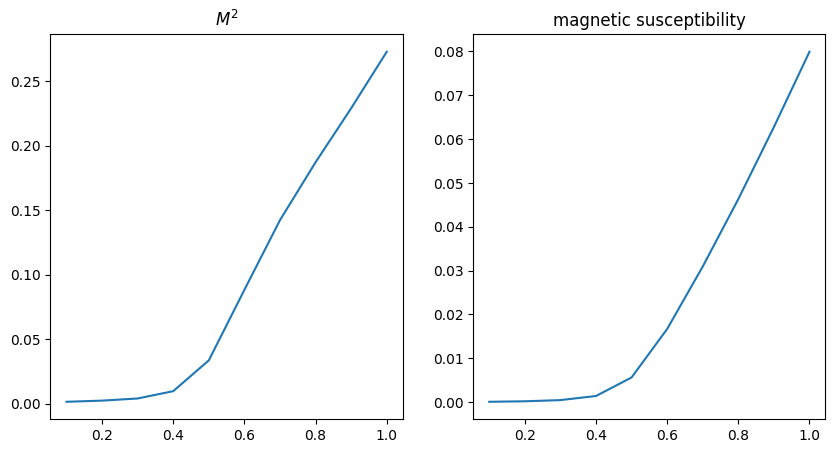

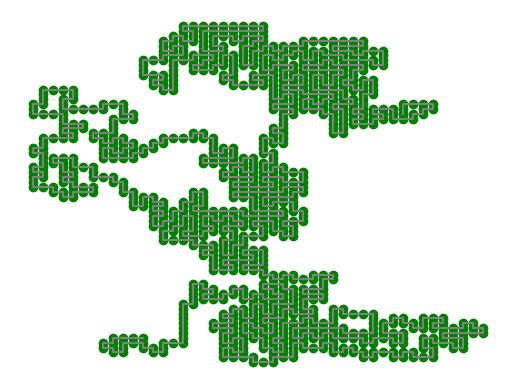

(array([4]), {})


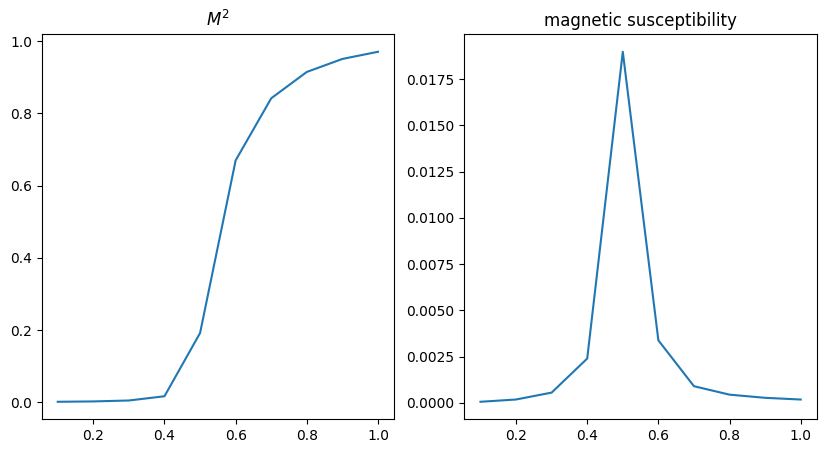

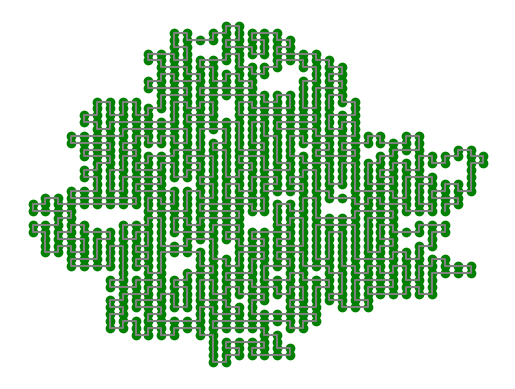

(array([4]), {})


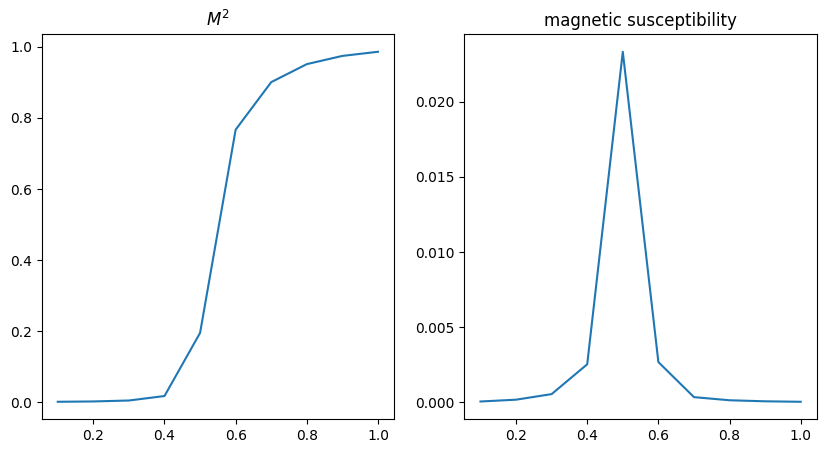

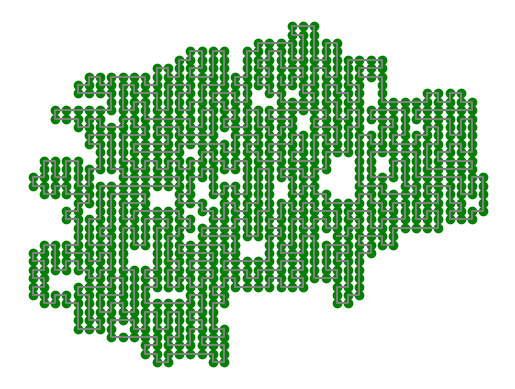

(array([4]), {})


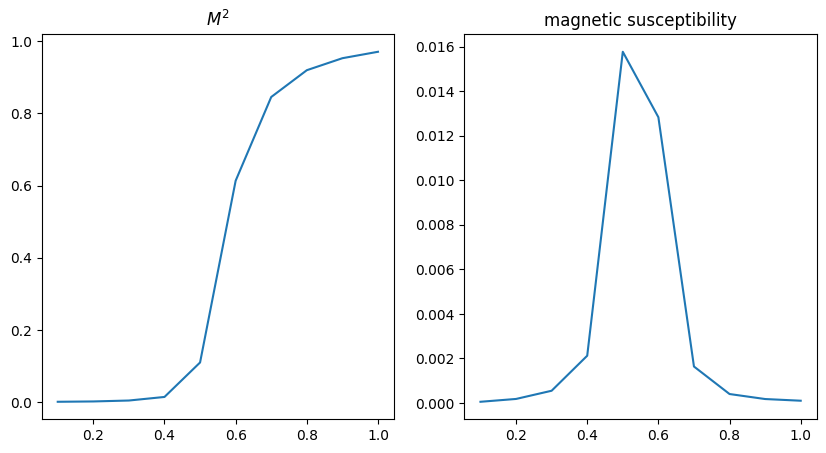

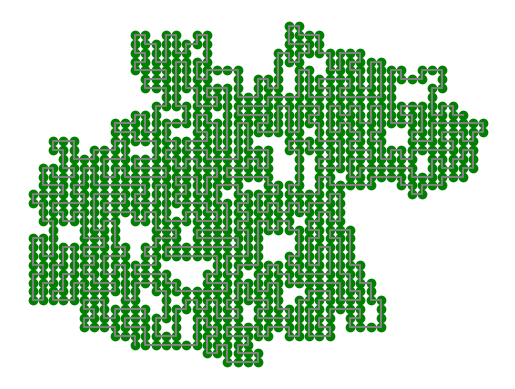

In [8]:
for i in range(0, 100, 10):
    c = confs_1000[i]
    ms = magnetic_susceptibility(c)
    print(find_peaks(ms))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(c.betas, c.mag2)
    ax1.set_title(r'$M^2$')
    ax2.set_title(r'magnetic susceptibility')
    ax2.plot(c.betas, ms)
    plt.show()
    draw_conformation(c.struct)

In [9]:
mean_ms = np.zeros(10)
for c in confs_1000:
    ms = magnetic_susceptibility(c)
    mean_ms += ms

mean_ms /= len(confs_1000)

error_ms = np.zeros(10)
for c in confs_1000:
    ms = magnetic_susceptibility(c)
    error_ms += (ms - mean_ms) ** 2

error_ms /= len(confs_1000)
error_ms = np.sqrt(error_ms)

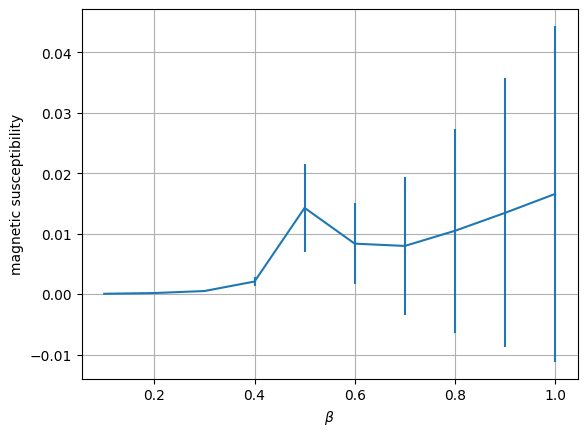

In [10]:
plt.errorbar(confs_1000[0].betas, mean_ms, yerr=error_ms)
plt.xlabel(r'$\beta$')
plt.ylabel('magnetic susceptibility')
plt.grid(True)
save_fig(plt.gcf(), 'reports/images/mean_mag_sus_L1000')

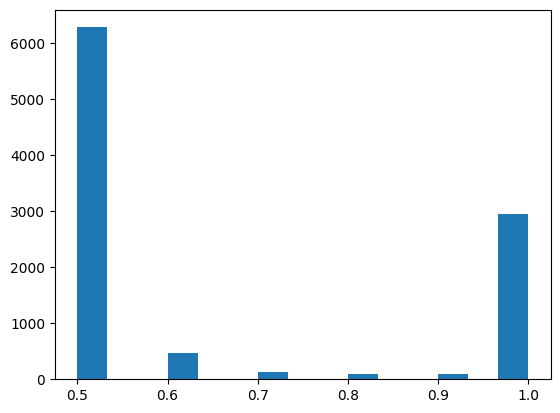

In [11]:
peaks = find_ms_peaks(confs_1000)
beta_peaks = confs_1000[0].betas[peaks]
plt.hist(beta_peaks, bins='auto');

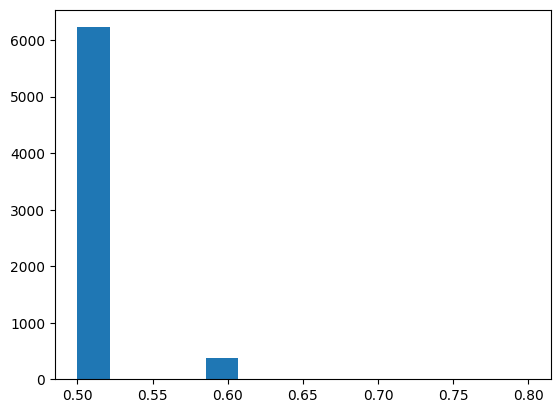

In [12]:
# filtering out nonmagnetic conformations
filtered_confs = [c for c in confs_1000 if c.mag2[-1] > 0.9]
peaks = find_ms_peaks(filtered_confs)
beta_peaks = filtered_confs[0].betas[peaks]
plt.hist(beta_peaks, bins='auto');

In [13]:
ind = peaks.index(5)
print(ind)

20


/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


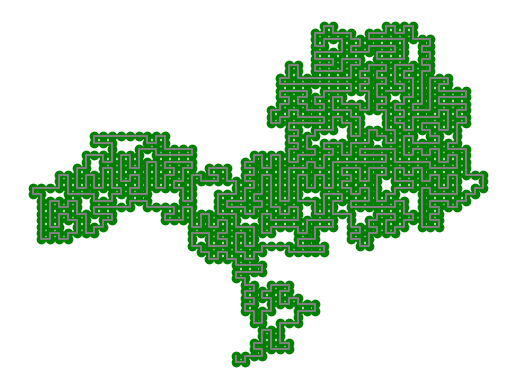

In [14]:
draw_conformation(filtered_confs[ind].struct)

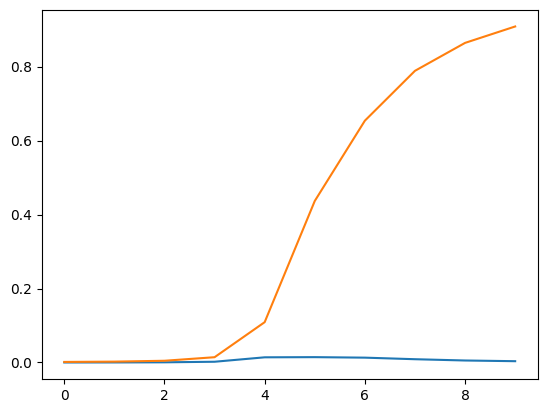

In [15]:
ms = magnetic_susceptibility(filtered_confs[ind])
plt.plot(ms);
plt.plot(filtered_confs[ind].mag2)

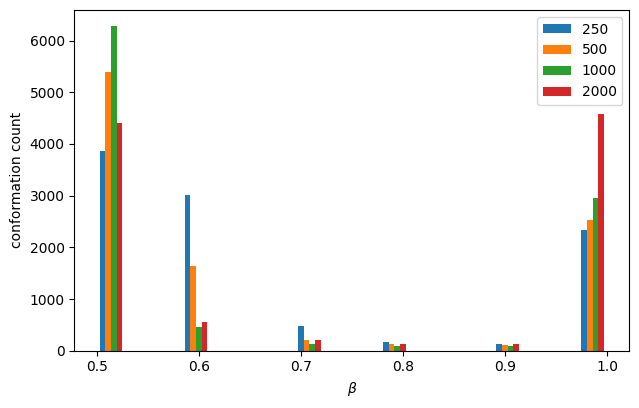

In [16]:
peaks_arr = []
for confs in all_confs:
    peaks = find_ms_peaks(confs)
    beta_peaks = confs[0].betas[peaks]
    peaks_arr.append(beta_peaks)
    
plt.figure(figsize=set_size(345, 1.0))
plt.xlabel(BETA)
plt.ylabel('conformation count')
plt.hist(peaks_arr, bins='auto', histtype='bar', label=[c[0].L-1 for c in all_confs])
    

plt.legend(loc='best')

fig = plt.gcf()
save_fig(fig, 'reports/images/ms_peaks_all_far')

fig.set_size_inches(set_size(345, 1.5))
plt.show()

In [17]:
mag2 = []
for confs in all_confs:
    confs = np.array(confs)
    peaks = np.array(find_ms_peaks(confs))
    no_peak_conf = confs[peaks==9]
    mag2.append(np.array([c.mag2 for c in no_peak_conf]))

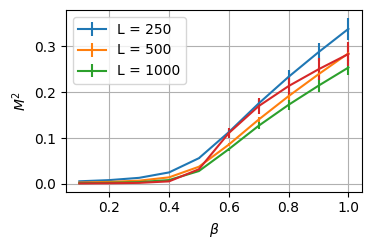

In [18]:
plt.figure(figsize=set_size(345, 0.8))
for mag in mag2:
    m = mag.mean(axis=0)
    er = ((mag - m)**2).mean(axis=0)
    plt.errorbar(all_confs[0][0].betas, m, yerr=er)
    

plt.legend(['L = 250', 'L = 500', 'L = 1000'], loc='best')
plt.grid(True)
plt.xlabel(BETA)
plt.ylabel(r'$M^2$')
save_fig(plt.gcf(), 'reports/images/mag2_no_peaks')
plt.show()

In [19]:
all_mask = []
for confs in all_confs:
    peaks = np.array(find_ms_peaks(confs))
    all_mask.append(peaks<=5)

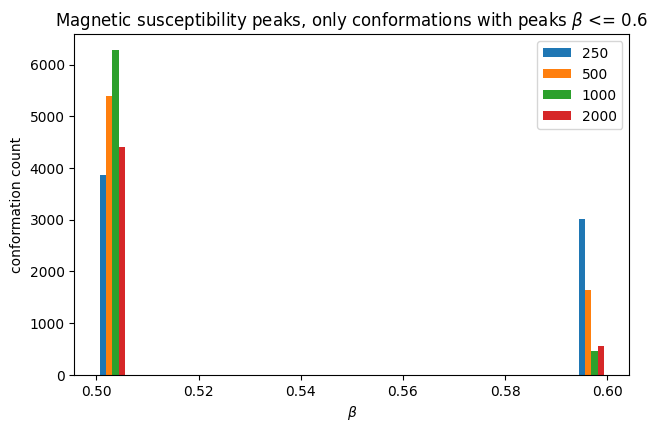

In [21]:
peaks_arr = []
for i, confs in enumerate(all_confs):
    confs = confs[all_mask[i]]
    peaks = find_ms_peaks(confs)
    beta_peaks = confs[0].betas[peaks]
    peaks_arr.append(beta_peaks)
    
plt.figure(figsize=set_size(345, 1.0))
plt.title(r'Magnetic susceptibility peaks, only conformations with peaks $\beta$ <= 0.6')
plt.xlabel(BETA)
plt.ylabel('conformation count')
plt.hist(peaks_arr, bins='auto', histtype='bar', label=[c[0].L-1 for c in all_confs])
    

plt.legend(loc='best')

fig = plt.gcf()

fig.set_size_inches(set_size(345, 1.5))
plt.show()

# L = 1000 close 

In [22]:
confs_1000_close = load_Conformations_lite_from_dir('Conformations/L1000_beta0.4_0.6_10(10000)/')

In [ ]:
peaks = find_ms_peaks(confs_1000_close)

In [ ]:
beta_peaks = confs_1000_close[0].betas[peaks]

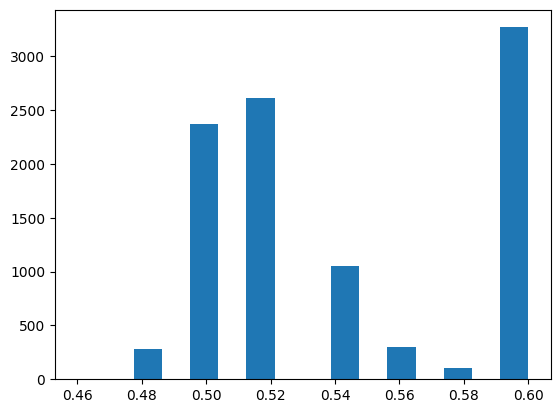

In [ ]:
plt.hist(beta_peaks, bins='auto');

In [ ]:
confs_1000_close[0].betas

array([0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 ])

# 500 close 

In [23]:
confs_500_close = load_Conformations_lite_from_dir('Conformations/L500_beta0.4_0.6_10(10000)/')

(array([], dtype=int64), {})


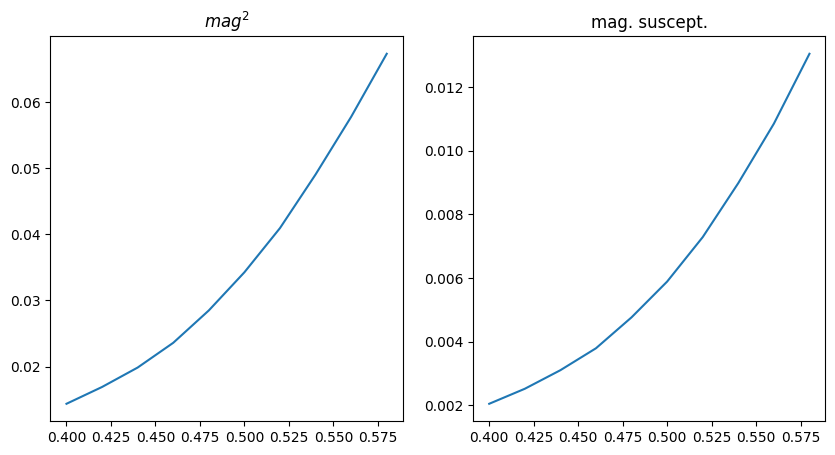

(array([6]), {})


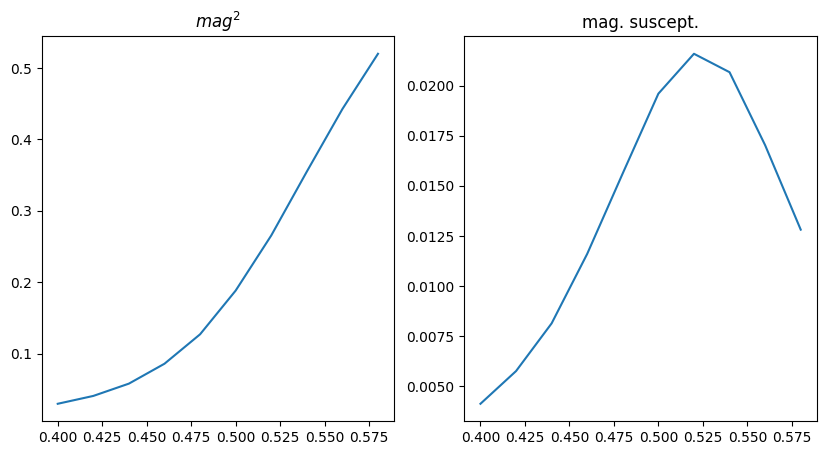

(array([], dtype=int64), {})


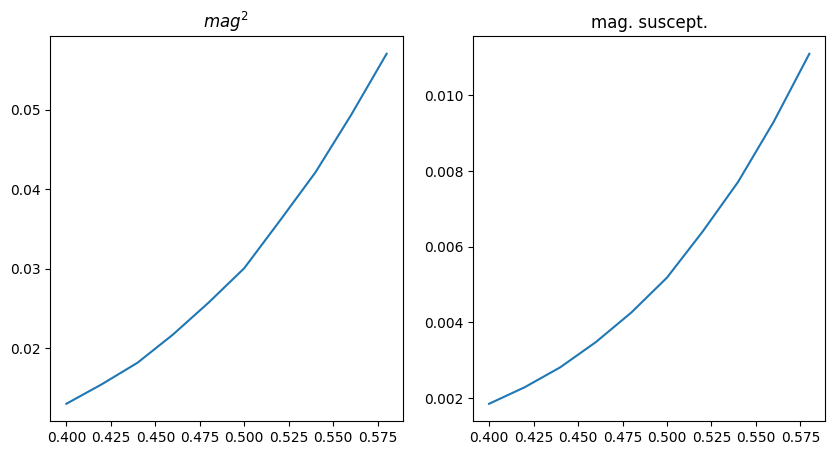

(array([8]), {})


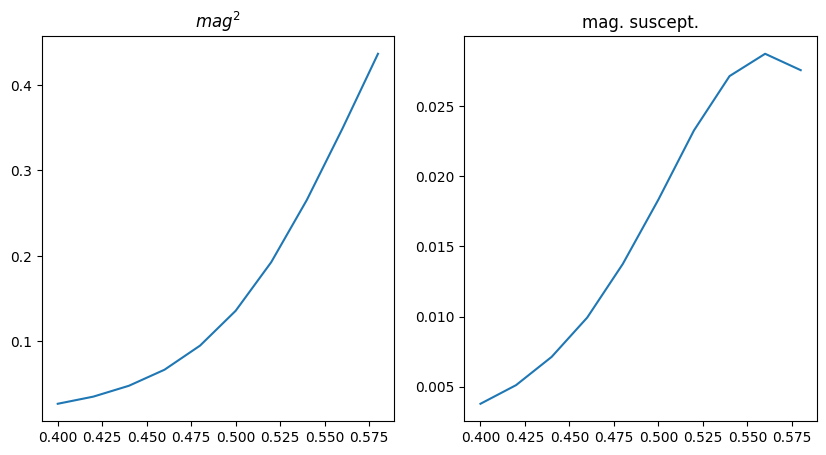

(array([], dtype=int64), {})


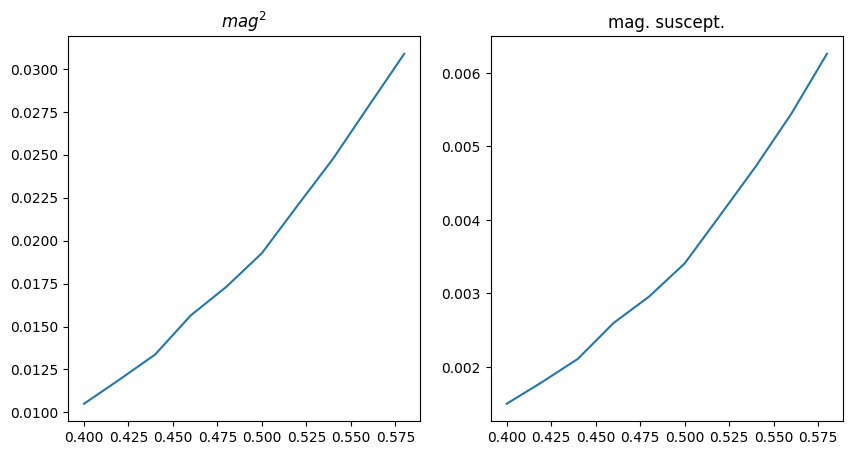

(array([5]), {})


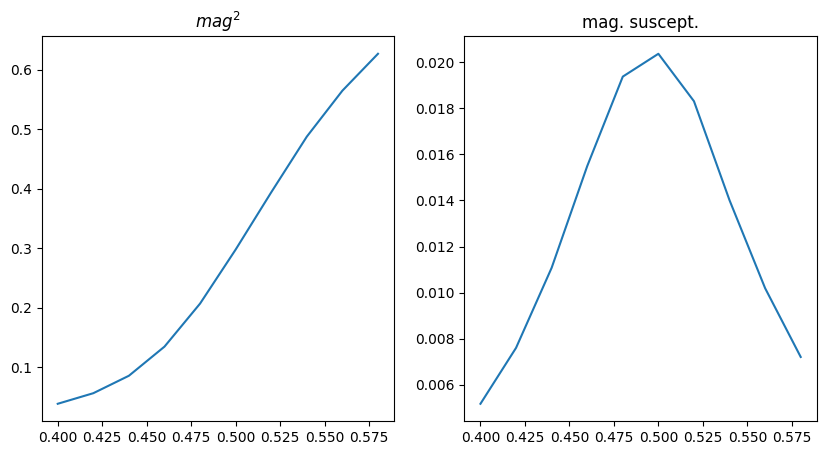

(array([], dtype=int64), {})


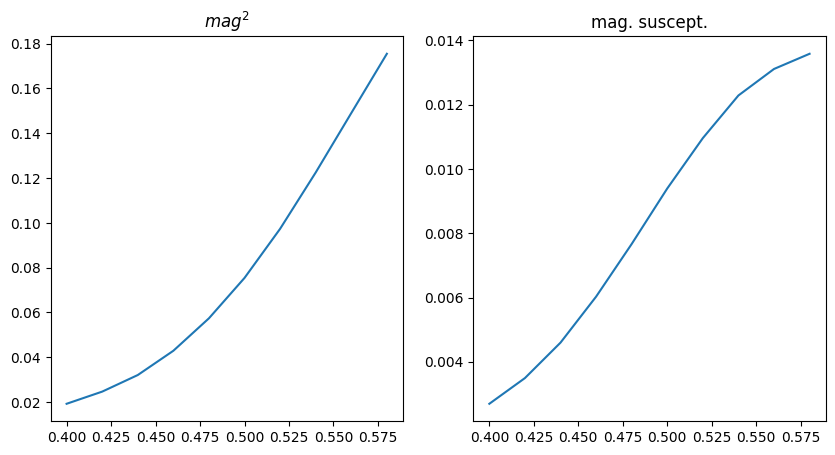

(array([7]), {})


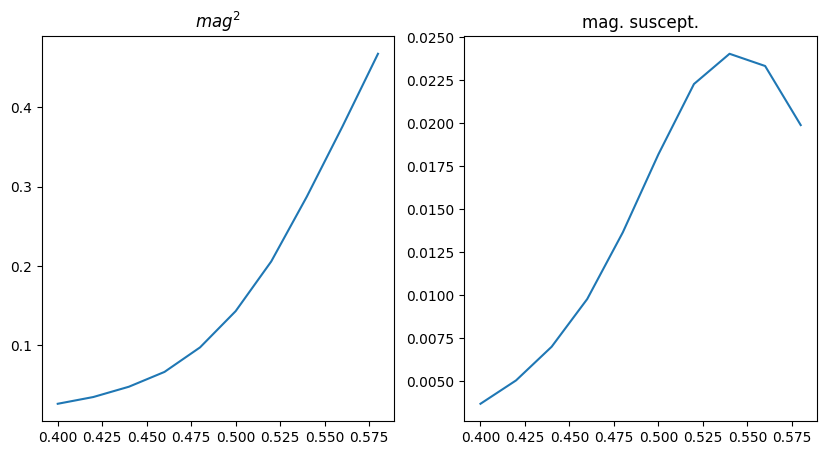

(array([5]), {})


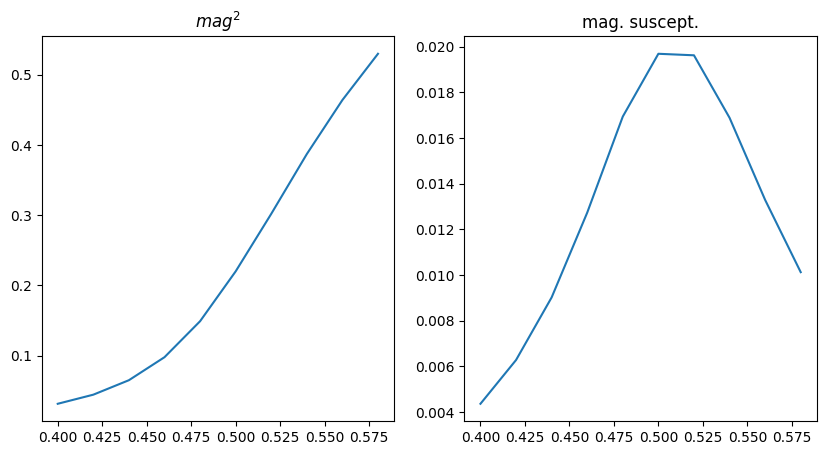

(array([5]), {})


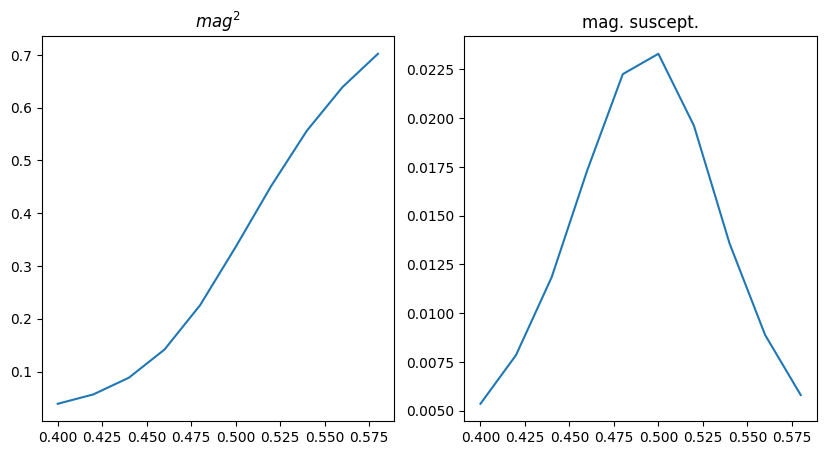

In [ ]:
for i in range(0, 100, 10):
    c = confs_500_close[i]
    ms = magnetic_susceptibility(c)
    print(find_peaks(ms))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(c.betas, c.mag2)
    ax1.set_title(r'$mag^2$')
    ax2.set_title(r'mag. suscept.')
    ax2.plot(c.betas, ms)
    plt.show()

In [ ]:
peaks = find_ms_peaks(confs_500_close)

In [ ]:
beta_peaks = confs_500_close[0].betas[peaks]

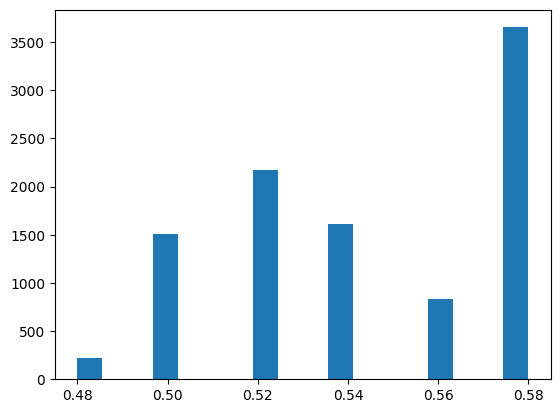

In [ ]:
plt.hist(beta_peaks, bins='auto');

# 250 close

In [24]:
confs_250_close = load_Conformations_lite_from_dir('Conformations/L250_beta0.4_0.6_10(10000)/')

In [ ]:
peaks_250 = find_ms_peaks(confs_250_close)

In [ ]:
beta_peaks_250 = confs_250_close[0].betas[peaks_250]

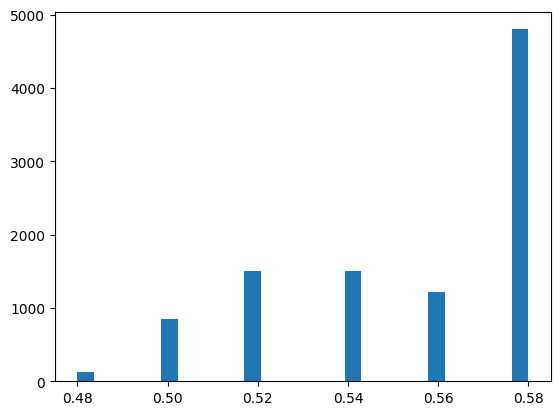

In [ ]:
plt.hist(beta_peaks_250, bins='auto');

## 2000 close

In [25]:
confs_2000_close = load_Conformations_lite_from_dir('Conformations/L2000_beta0.4_0.6_10(10000)/')

## All close

In [26]:
all_close = [np.array(confs_250_close),
             np.array(confs_500_close), 
             np.array(confs_1000_close), 
             np.array(confs_2000_close)]


In [27]:
close_w_peaks = []
for i, confs in enumerate(all_close):
    selected_confs = confs[all_mask[i]]
    close_w_peaks.append(selected_confs)

6873


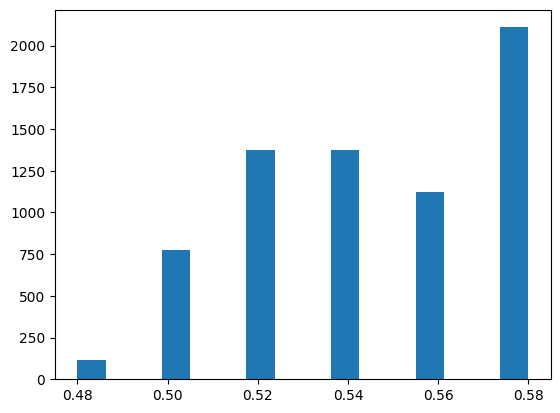

7037


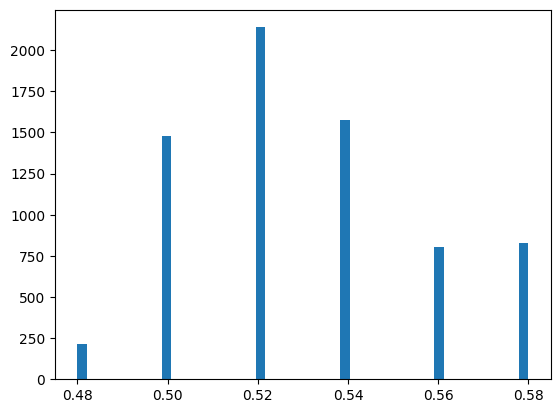

6739


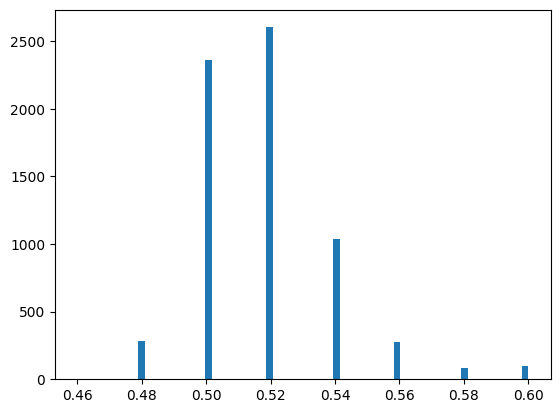

4957


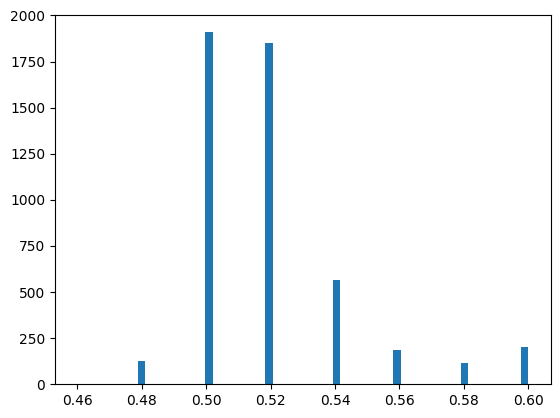

In [28]:
for selected_confs in close_w_peaks:
    print(len(selected_confs))
    peaks = find_ms_peaks(selected_confs)
    beta_peaks = selected_confs[0].betas[peaks]
    plt.hist(beta_peaks, bins='auto')
    plt.show()

6873
7037
6739
4957


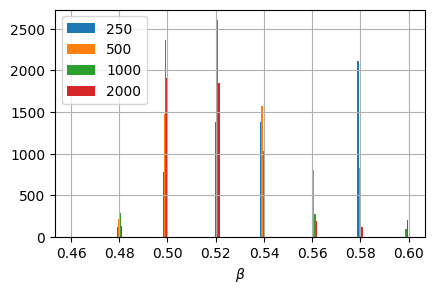

In [41]:
all_peaks = []
for selected_confs in close_w_peaks:
    print(len(selected_confs))
    peaks = find_ms_peaks(selected_confs)
    beta_peaks = selected_confs[0].betas[peaks]
    all_peaks.append(beta_peaks)
    
    
plt.figure(figsize=set_size(345, 1))
plt.hist(all_peaks, bins='auto')
plt.legend([c[0].L -1 for c in all_confs], loc='best')
plt.xlabel(BETA)
plt.grid(True)
save_fig(plt.gcf(), 'reports/images/ms_peaks_close')
plt.show()

## Selecting conformations using clusters

In [42]:
def max_clasters(conformations):
    max_cl_size = []
    for c in conformations:
        nghbr = tabulate_neighbors(c.struct)
        cl, _, _ = clusters_and_bridges(nghbr)
        if len(cl) == 0:
            max_cl_size.append(0)
        else:
            max_cl_size.append(max(cl) / len(c.struct))
    return np.array(max_cl_size)

In [43]:
mc = max_clasters(confs_250_close)

In [44]:
def select_conf_cluster(conformations, thr):
    mc = max_clasters(conformations)
    res = np.array(conformations)
    res = res[mc > thr]
    return res

In [45]:
claster_thrs = (0., 0.3, 0.5, 0.8)

In [48]:
hist_data = []
for confs_cur in all_close:
    L = confs_cur[0].L - 1
    thr_peaks = []
    betas = confs_cur[0].betas
    for thr in claster_thrs:
        confs = select_conf_cluster(confs_cur, thr)
        peaks = find_ms_peaks(confs)
        beta_peaks = betas[peaks]
        thr_peaks.append(beta_peaks)
    
    hist_data.append((thr_peaks, L))


In [85]:
hist_peaks_all_clusters = hist_data

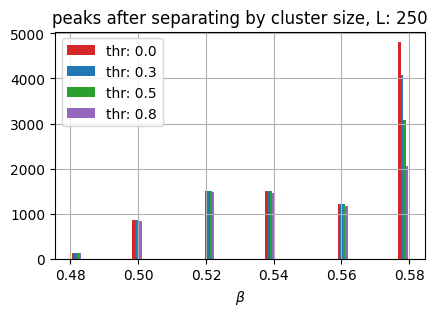

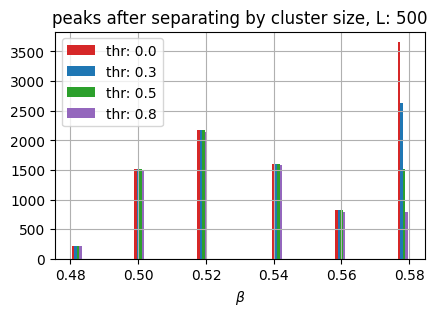

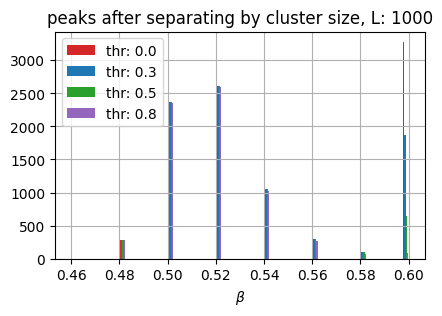

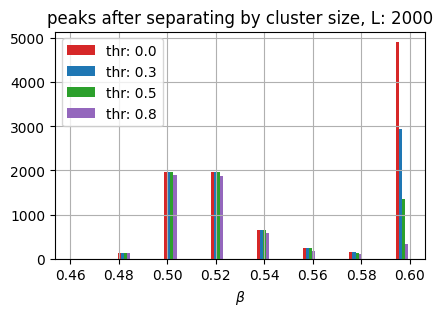

In [84]:
for thr_peaks, L in hist_data:
    plt.figure(figsize=set_size())
    plt.title(f'peaks after separating by cluster size, L: {L}')
    plt.hist(thr_peaks, bins='auto', color=['tab:red', 'tab:blue', 'tab:green', 'tab:purple'])
    plt.legend([f'thr: {x}' for x in claster_thrs], loc='best')
    plt.xlabel(BETA)
    plt.grid(True)
    save_fig(plt.gcf(), f'./reports/images/magnetic_susceptibility/close_peaks_separated_by_cluster_size_L{L}')
    plt.show()

when changing cluster size threshold destibution does not change, except the far right value, which includes all conformations hich have magnetic susceptibility peak outside of the measured interval of $\beta$

## Selecting conformations using radius of gyration

In [ ]:
def select_conf_raduis(conformations, thr):
    rads = [c.R_norm for c in conformations]
    rads = np.array(rads)
    res = np.array(conformations)
    res = res[rads < thr]
    return res

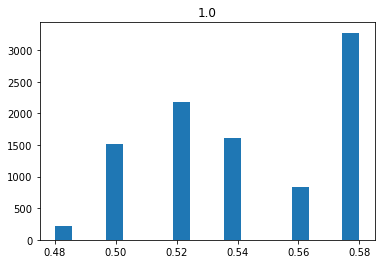

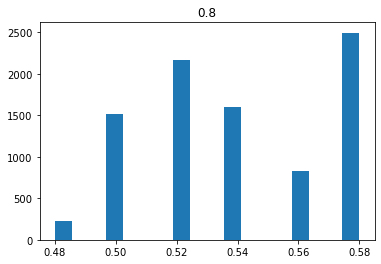

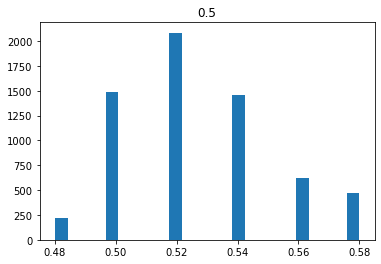

In [ ]:
for thr in (1., 0.8, 0.5):
    confs = select_conf_raduis(confs_500_close, thr)
    peaks_500 = find_ms_peaks(confs)
    beta_peaks_500 = confs_500_close[0].betas[peaks_500]
    plt.title(f'{thr}')
    plt.hist(beta_peaks_500, bins='auto')
    plt.show()

Changing raius threshold has effect simular to changing cluster size threshold

# One dimentional Ising model

In [ ]:
struct1D = generate_1D(1000)

/home/roman/Programs/projects/Ising-on-random-conformation/utils.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(struct[:, 0], struct[:, 1], '-g', color='gray')


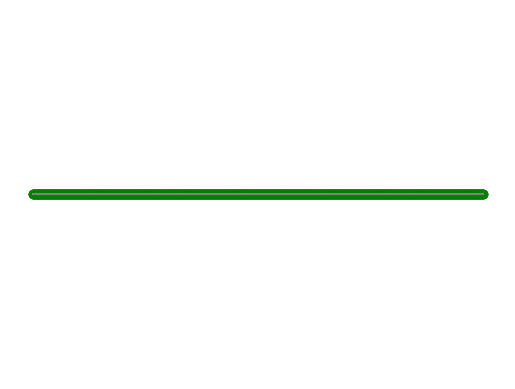

In [ ]:
draw_conformation(struct1D)

In [ ]:
nghbr = tabulate_neighbors(struct1D)
mag_abs, mag2 = [], []
betas = confs_1000[0].betas
for beta in betas:
    _, ma, m2, _, _ = simulate(nghbr, 
                         beta=beta,
                         num_sweeps=100000,
                         num_therm=100000)
    mag_abs.append(ma)
    mag2.append(m2)
    print(m2.errorbar)
    print(ma.errorbar)
    
mag_abs = np.array(mag_abs)
mag2 = np.array(mag2)

0.00010717261382179863
0.0011217777640549075
0.00014979775901090346
0.001614969022549662
9.101450624809018e-05
0.0009473083059733266
0.00014853227591373692
0.0012298323929565591
0.00014266177433396043
0.0010669094520357925
0.00016495288464085759
0.0012910643021640938
0.0001952069924939832
0.0013035514732364455
0.00017605055158263942
0.0010660368803711775
0.00024252523911231805
0.0012037095430672692
0.0002135036395860437
0.0010554779162847566


In [ ]:
line_1D = Conformation_lite()
line_1D.struct = struct1D
line_1D.mag2 = np.array([m.mean for m in mag2])
line_1D.mag_abs = np.array([m.mean for m in mag_abs])
# line_1D.betas = confs_1000[0].betas
line_1D.betas = betas

In [ ]:
ms_1D = magnetic_susceptibility(line_1D)

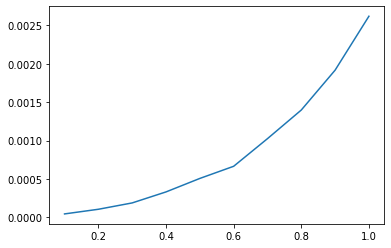

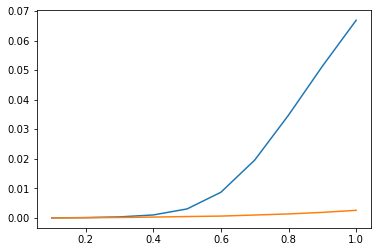

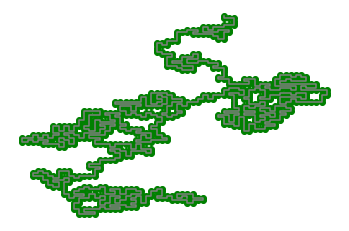

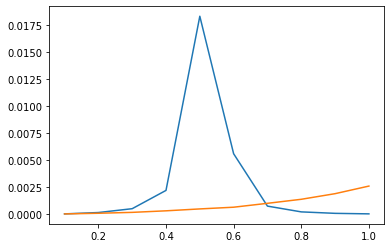

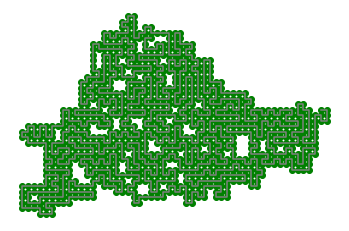

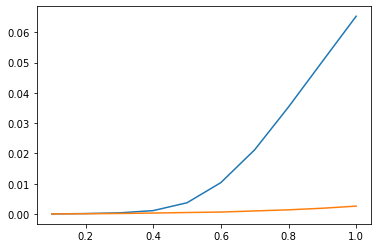

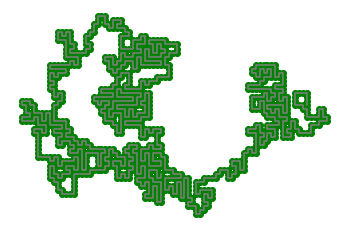

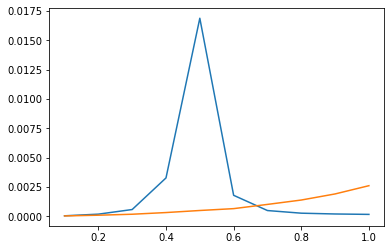

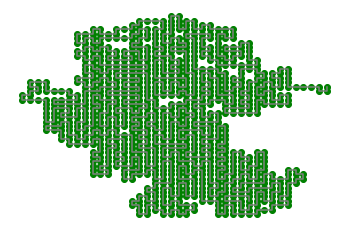

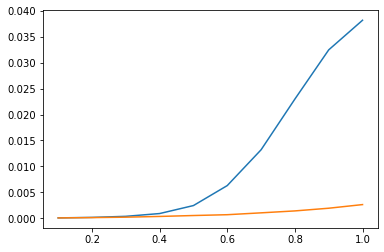

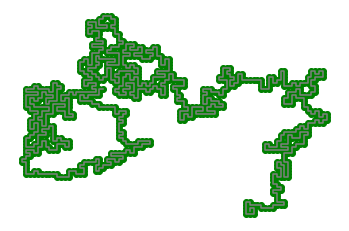

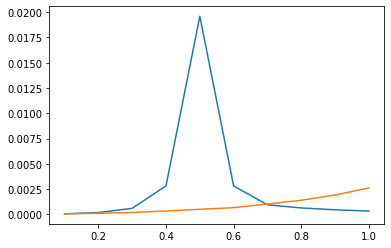

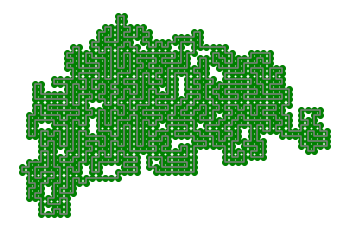

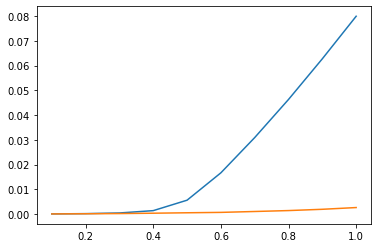

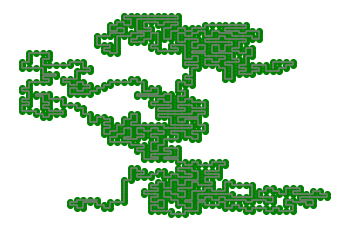

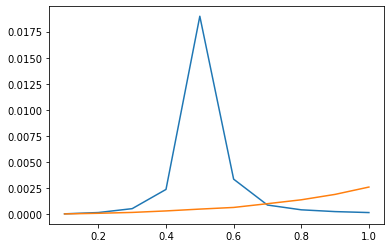

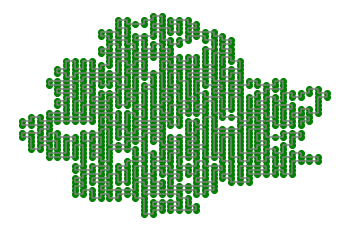

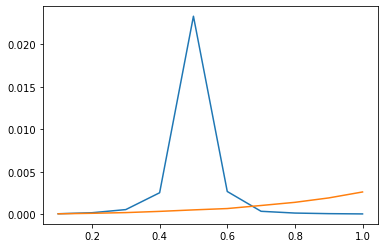

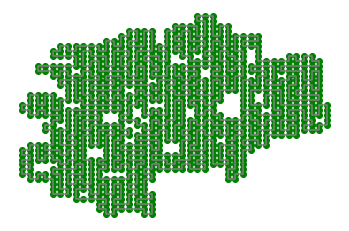

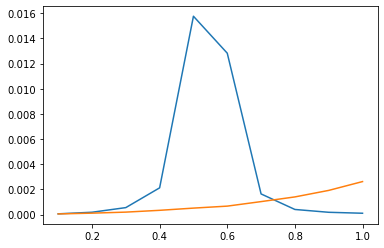

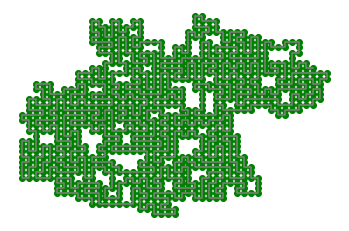

In [ ]:
plt.plot(line_1D.betas, ms_1D)
plt.show()
for i in range(0, 100, 10):
    c = confs_1000[i]
    ms = magnetic_susceptibility(c)
    plt.plot(c.betas, ms)
    plt.plot(line_1D.betas, ms_1D)
    plt.show()
    draw_conformation(c.struct)

In [ ]:
c = confs_1000[20]
ms = magnetic_susceptibility(c)
plt.plot(c.betas, ms, label='conformation')
p = 1.3
mult = ms[-1] / ms_1D[-1]**p  
plt.plot(line_1D.betas, ms_1D**p*mult, label='1D model')
plt.xlabel(r'$\beta$')
plt.ylabel(r'magnetic susceptibility')
plt.legend(loc='best')
# draw_conformation(c.struct)

# Clusterized confromations

In [ ]:
import os
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

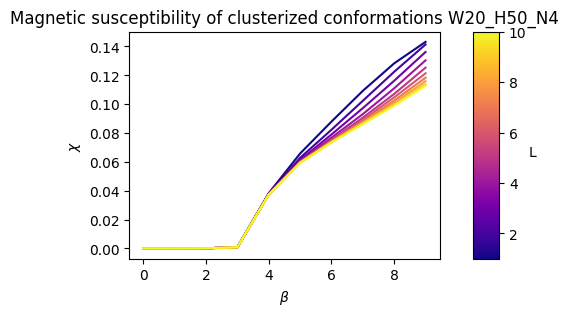

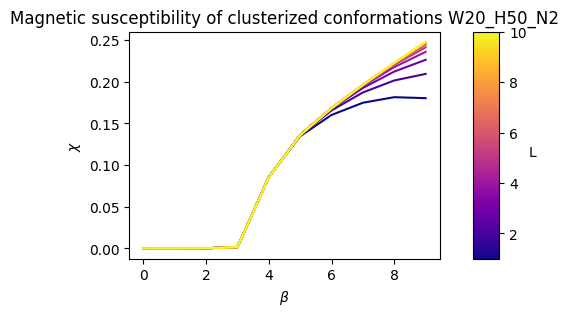

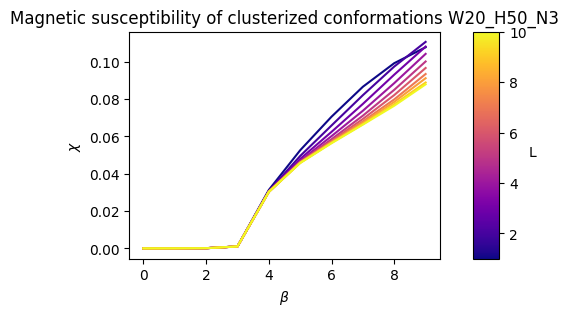

In [ ]:

for d in os.listdir('./Conformations/clusterized/'):
    if d.startswith('W'):
        clusters = load_Conformations_lite_from_dir(f'./Conformations/clusterized/{d}/')
        fig, ax = plt.subplots(1, 2, figsize=set_size(), width_ratios=[12, 1], )
        ax, clb = ax
        ax.set_title(f'Magnetic susceptibility of clusterized conformations ' + d)
        ax.set_xlabel(r'$\beta$')
        ax.set_ylabel(r'$\chi$')
        norm = mpl.colors.Normalize(vmin=1, vmax=len(clusters))
        cl = mpl.colorbar.Colorbar(
            clb,
            cmap='plasma',
            norm=norm
        )
        clb.set_ylabel('L', rotation=0)
        for i, c in enumerate(clusters):
            ms = magnetic_susceptibility(c)
            """brightness shows length of the bridge between clusters, black: short, red: long"""
            ax.plot(ms, c = cl.cmap(norm(i+1)))

        if(d.find('W20_H50') != -1):
            save_fig(plt.gcf(), f'./reports/images/magnetic_susceptibility/clusterized_{d}')
            plt.show()
        
        plt.close()